In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def summary(df):
    
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} observations.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

def scale(X):   
    
    from sklearn import preprocessing
    num_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "TotalExpense"]
    scaler = preprocessing.StandardScaler().fit(X[num_cols])
    X_scaled = pd.DataFrame(scaler.transform(X[num_cols]))
    X_scaled.columns = num_cols
    X = X.drop(num_cols, axis='columns')
    X = pd.concat([X, X_scaled], axis='columns')

    return X

def data_prep(df):
    #split and delete Cabin
    df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand = True) 

    #drop unwanted X
    df = df.drop(["PassengerId", "Cabin", "Name"], axis = 'columns')

    # Create a new feature "TotalExpense"
    amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    df['TotalExpense'] = df[amenities].sum(axis = 1)

    categ_cols = ["HomePlanet", "Destination", "CryoSleep", "VIP", "Deck", "Side", "Num"] #Num was also Category as we split from Cabin
    num_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "TotalExpense"]

    #encoding
    from sklearn.preprocessing import OrdinalEncoder
    encoder = OrdinalEncoder().fit(df[categ_cols])
    df[categ_cols] = encoder.transform(df[categ_cols])

    #imputation
    from sklearn.impute import SimpleImputer
    from sklearn.impute import KNNImputer

    knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")   
    df[num_cols] = knn_imputer.fit_transform(df[num_cols])

    imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imp_freq.fit(df[categ_cols])
    df[categ_cols]= imp_freq.transform(df[categ_cols])

    from sklearn.preprocessing import LabelEncoder
    if "Transported" in df.columns:
        target = LabelEncoder().fit(df["Transported"])
        df["Transported"] = target.transform(df["Transported"])

    return df

In [41]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
summary(df_train)

Dataset has 14 features and 8693 observations.


,Unique,Missing,Duplicated,Types
PassengerId,8693,0,0,object
HomePlanet,3,201,0,object
CryoSleep,2,217,0,object
Cabin,6560,199,0,object
Destination,3,182,0,object
Age,80,179,0,float64
VIP,2,203,0,object
RoomService,1273,181,0,float64
FoodCourt,1507,183,0,float64
ShoppingMall,1115,208,0,float64


In [42]:
PassengerId_test = df_test['PassengerId'] #write submission file later
df_train = data_prep(df_train)
df_test = data_prep(df_test)
summary(df_train)

Dataset has 15 features and 8693 observations.


,Unique,Missing,Duplicated,Types
HomePlanet,3,0,24,float64
CryoSleep,2,0,24,float64
Destination,3,0,24,float64
Age,104,0,24,float64
VIP,2,0,24,float64
RoomService,1297,0,24,float64
FoodCourt,1534,0,24,float64
ShoppingMall,1141,0,24,float64
Spa,1359,0,24,float64
VRDeck,1336,0,24,float64


In [43]:
X_train = df_train.drop(['Transported'], axis = 'columns')
Y_train = df_train['Transported']

In [44]:
X_train_scaled = scale(X_train)

## Parameter selection

In [ ]:
# Cross validation, testing different values of C parameter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
C_list = [0.001, 0.005, 0.1, 0.5, 1, 1.5, 2]
C_score = []

for c in C_list:
    print(f"C = {c}")
    clf = LogisticRegression(C=c, max_iter=10000)
    cv_res = cross_val_score(clf, X_train, Y_train, cv=10)
    C_score.append(cv_res.mean())
C_score

# Plotting the mean cross-validation scores for different C values
plt.figure(figsize=(10, 6))
plt.plot(C_list, C_score, color='blue',marker='o')
plt.title('Performance Vs C value')
plt.xlabel('C Value')
plt.ylabel('Performance')
plt.grid(True)
plt.show()

In [ ]:
# Cross validation, testing different values of C parameter
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
C_list = [2, 3, 5,6,7,8,9, 10, 11, 12, 13.5]
C_score = []

for c in C_list:
    print(f"C = {c}")
    clf = SVC(C=c)
    cv_res = cross_val_score(clf, X_train, Y_train, cv=10)
    C_score.append(cv_res.mean())
C_score

# Plotting the mean cross-validation scores for different C values
plt.figure(figsize=(10, 6))
plt.plot(C_list, C_score,color='blue', marker='o')
plt.title('Performance Vs C value')
plt.xlabel('C Value')
plt.ylabel('Performance')
plt.grid(True)
plt.show()

max_depth = 1
max_depth = 2
max_depth = 3
max_depth = 4
max_depth = 5
max_depth = 6
max_depth = 7
max_depth = 8
max_depth = 9
max_depth = 10


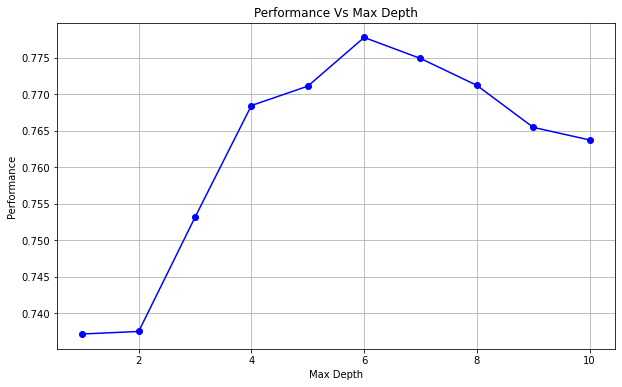

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Assuming X_train and Y_train are already defined
max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
max_depth_score = []

for depth in max_depth_list:
    print(f"max_depth = {depth}")
    clf = DecisionTreeClassifier(max_depth=depth)
    cv_res = cross_val_score(clf, X_train, Y_train, cv=10)
    max_depth_score.append(cv_res.mean())
max_depth_score

# Plotting the mean cross-validation scores for different max_depth values
plt.figure(figsize=(10, 6))
plt.plot(max_depth_list, max_depth_score, color='blue', marker='o')
plt.title('Performance Vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Performance')
plt.grid(True)
plt.show()

In [ ]:
# Function to get best hyperparameters
def get_best_param(model, X_train, Y_train):
    # define hyperparameter grids for different models
    hyperparameter_grids = {
        'DecisionTreeClassifier()': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2']
        },
        'RandomForestClassifier()': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        },
        'GradientBoostingClassifier()': {
            'n_estimators' : [100, 200, 300],
            'learning_rate': [0.1, 0.05, 0.01, 0.001],
            'max_depth': [4, 8],
            'min_samples_leaf': [100, 150],
            'max_features': [0.3, 0.2, 0.1]
        },
        'AdaBoostClassifier()': {
            'n_estimators':[10,50,250,1000],
            'learning_rate':[0.01,0.1]
        },
        'CatBoostClassifier()': {
            'depth': [1,2,3],
            'learning_rate': [0.01,0.02],
        },
    }

    param_grid = hyperparameter_grids[model.__class__.__name__ + '()']

    if param_grid is None:
        raise ValueError("Model not supported or hyperparameter grid not defined")

    grid_search = GridSearchCV(model, param_grid=param_grid, scoring="accuracy", cv=5)
    grid_search.fit(X_train, Y_train)

    return grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_

In [ ]:
# Get best hyperparameters for CatBoostClassifier
get_best_param(RandomForestClassifier(), X_train, Y_train)

# Cross Validation 

In [89]:
def get_CV_score(X_train, Y_train):
    
    print('------- Importing libraries -------')
    import pandas as pd
    from sklearn.model_selection import cross_val_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
    from catboost import CatBoostClassifier
    from xgboost import XGBClassifier
    from lightgbm import LGBMClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier

    print('------- Instantiating Models -------')
    models = {
        'Logistic Regression': LogisticRegression(penalty='l2', C=0.005, max_iter=10000),
        'SVC': SVC(C=9, kernel ='rbf'),
#         'CatBoost': CatBoostClassifier(depth=5, iterations=1001, learning_rate=0.05, verbose=0, l2_leaf_reg=2),
#         'AdaBoost': AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.1, n_estimators=1000),
#         'XGBoost': XGBClassifier(objective='binary:logistic',
#                                 colsample_bytree=0.4603, gamma=0.0468,
#                                 learning_rate=0.05, max_depth=10,
#                                 min_child_weight=1.7817, n_estimators=3000,
#                                 reg_alpha=4.5, reg_lambda=8.5,
#                                 subsample=0.5213,
#                                 random_state=42),
#         'GradientBoosting': GradientBoostingClassifier(learning_rate=0.01, max_depth=8, max_features=0.3
#                                                         , min_samples_leaf=100, n_estimators=3000),
#         'Light Gradient-Boosting (LGBM)': LGBMClassifier(),
         'DecisionTreeClassifier ' : DecisionTreeClassifier(criterion='entropy', max_depth = 6),
#         'KNeighborsClassifier' : KNeighborsClassifier(),
     }
    
    # perform 10 folds cross-validation and store results
    CV_res = {}
    for name, model in models.items():
        print(f'------- Fitting {name} -------')
        score = cross_val_score(model, X_train, Y_train, cv=10).mean()
        CV_res[name] = score

    # create dataframe
    df = pd.DataFrame(list(CV_res.items()), columns=['Model', 'Score'])
    
    print(f'------- Printing Dataframe -------')
    return df

In [90]:
get_CV_score(X_train, Y_train)

------- Importing libraries -------
------- Instantiating Models -------
------- Fitting Logistic Regression -------
------- Fitting SVC -------
------- Fitting DecisionTreeClassifier  -------
------- Printing Dataframe -------


,Model,Score
0,Logistic Regression,0.789721
1,SVC,0.792135
2,DecisionTreeClassifier,0.781898


# Split Train and Test Dataset | Unscaled Data

In [93]:
def train_split_score(X_train, Y_train):
    
    print('------- Importing libraries -------')
    import pandas as pd
    from sklearn.model_selection import cross_val_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
    from catboost import CatBoostClassifier
    from xgboost import XGBClassifier
    from lightgbm import LGBMClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier

    print('------- Instantiating Models -------')
    models = {
        'Logistic Regression': LogisticRegression(penalty='l2', C=0.005, max_iter=10000),
         'SVC': SVC(C=9, kernel ='rbf'),
#         'CatBoost': CatBoostClassifier(depth=5, iterations=1001, learning_rate=0.05, verbose=0, l2_leaf_reg=2),
#         'AdaBoost': AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.1, n_estimators=1000),
#         'XGBoost': XGBClassifier(objective='binary:logistic',
#                                 colsample_bytree=0.4603, gamma=0.0468,
#                                 learning_rate=0.05, max_depth=10,
#                                 min_child_weight=1.7817, n_estimators=3000,
#                                 reg_alpha=4.5, reg_lambda=8.5,
#                                 subsample=0.5213,
#                                 random_state=42),
#         'GradientBoosting': GradientBoostingClassifier(learning_rate=0.01, max_depth=8,
#                                                        max_features=0.3, min_samples_leaf=100, n_estimators=3000),
#         'Light Gradient-Boosting (LGBM)': LGBMClassifier(),
         'DecisionTreeClassifier ' : DecisionTreeClassifier(criterion='entropy', max_depth = 6),
#          'KNeighborsClassifier' : KNeighborsClassifier(),
    }

    from sklearn.model_selection import train_test_split

    # 1. Traditional Train-Test Split Approach
    # Split the data into training and testing sets
    split_X_train, split_X_test, split_Y_train, split_Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

    # save result
    train_split_res = {}
    for name, model in models.items():
        print(f'------- Fitting {name} -------')
        model_ = model #assign each Classifier to varaible "model_" for later use
        model_.fit(split_X_train, split_Y_train)
        score = model_.score(split_X_test, split_Y_test)
        train_split_res[name] = score

    # create dataframe
    df = pd.DataFrame(list(train_split_res.items()), columns=['Model', 'Score'])
    
    print(f'------- Printing Dataframe -------')
    return df

In [94]:
train_split_score(X_train, Y_train)

------- Importing libraries -------
------- Instantiating Models -------
------- Fitting Logistic Regression -------
------- Fitting SVC -------
------- Fitting DecisionTreeClassifier  -------
------- Printing Dataframe -------


,Model,Score
0,Logistic Regression,0.777458
1,SVC,0.775733
2,DecisionTreeClassifier,0.771708


# Split Train and Test Dataset | Scaled Data

In [40]:
def trian_split_score(X_train_scaled, Y_train):
    
    print('------- Importing libraries -------')
    import pandas as pd
    from sklearn.model_selection import cross_val_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
    from catboost import CatBoostClassifier
    from xgboost import XGBClassifier
    from lightgbm import LGBMClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB

    print('------- Instantiating Models -------')
    models = {
        'Logistic Regression': LogisticRegression(penalty='l2', C=0.05, max_iter=10000),
        'SVC': SVC(C=0.5),
#         'CatBoost': CatBoostClassifier(depth=5, iterations=1001, learning_rate=0.05, verbose=0, l2_leaf_reg=2),
#         'AdaBoost': AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.1, n_estimators=1000),
#         'XGBoost': XGBClassifier(objective='binary:logistic',
#                                 colsample_bytree=0.4603, gamma=0.0468,
#                                 learning_rate=0.05, max_depth=10,
#                                 min_child_weight=1.7817, n_estimators=3000,
#                                 reg_alpha=4.5, reg_lambda=8.5,
#                                 subsample=0.5213,
#                                 random_state=42),
#         'GradientBoosting': GradientBoostingClassifier(learning_rate=0.01, max_depth=8,
#                                                        max_features=0.3, min_samples_leaf=100, n_estimators=3000),
#         'Light Gradient-Boosting (LGBM)': LGBMClassifier(),
#         'DecisionTreeClassifier ' : DecisionTreeClassifier(),
#             'KNeighborsClassifier' : KNeighborsClassifier(n_neighbors = 2),
#         'GaussianNB' : GaussianNB(),
    }

    from sklearn.model_selection import train_test_split

    # 1. Traditional Train-Test Split Approach
    # Split the data into training and testing sets
    split_X_train_scaled, split_X_test_scaled, split_Y_train_scaled, split_Y_test_scaled = train_test_split(X_train_scaled, Y_train, test_size=0.2, random_state=42)

    # save result
    train_split_res = {}
    for name, model in models.items():
        print(f'------- Fitting {name} -------')
        model_ = model #assign each Classifier to varaible "model_" for later use
        model_.fit(split_X_train_scaled, split_Y_train_scaled)
        score = model_.score(split_X_test_scaled, split_Y_test_scaled)
        train_split_res[name] = score

    # create dataframe
    df = pd.DataFrame(list(train_split_res.items()), columns=['Model', 'Score'])
    
    print(f'------- Printing Dataframe -------')
    return df

In [41]:
trian_split_score(X_train_scaled, Y_train)

------- Importing libraries -------
------- Instantiating Models -------
------- Fitting Logistic Regression -------
------- Fitting SVC -------
------- Printing Dataframe -------


,Model,Score
0,Logistic Regression,0.770558
1,SVC,0.525589


# Feature Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from catboost import CatBoostClassifier

sfs_forward = SequentialFeatureSelector(
    CatBoostClassifier(verbose=0), cv=5, direction="forward", scoring='f1'
).fit(X_train, Y_train)

In [ ]:
list(sfs_forward.get_feature_names_out())

In [ ]:
# Result from Feature Selection
best_features = ['CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'Deck', 'Side', 'TotalExpense']

# Submit

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(verbose=0) #if tune hyperparam, get lower score
cat.fit(X_train[best_features], Y_train)
cat_Y = cat.predict(df_test[best_features])

In [ ]:
res = pd.DataFrame(
        {
            'PassengerId': list(PassengerId_test),
            'Transported': [(p == 1) for p in list(cat_Y)]
        }
    )

res.to_csv('submission.csv', index = False)

In [142]:
df_sub = pd.read_csv('dataSubmission.csv')
df_sub.head()

,score,nbSubmission
0,0.79003,68
1,0.81809,67
2,0.81669,66
3,0.81786,65
4,0.81575,64


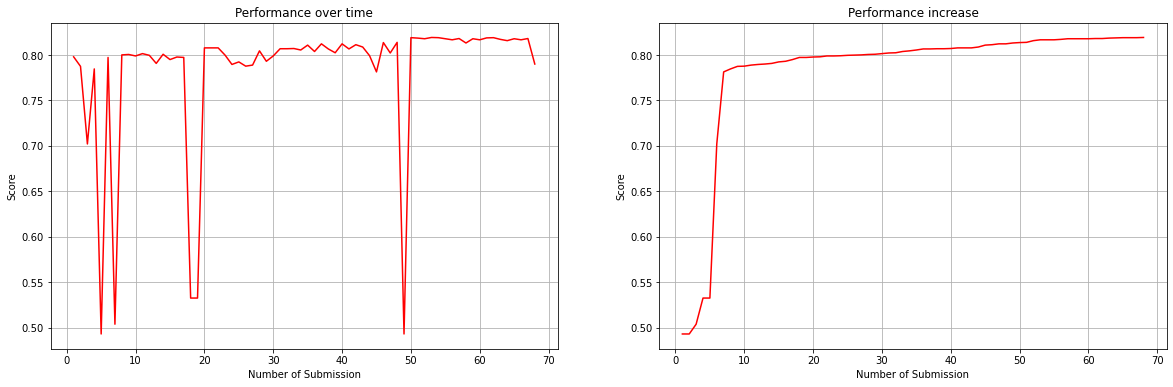

In [143]:
# Now let's plot the score over the rank number
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axs[0].plot(df_sub['nbSubmission'], df_sub['score'], color = 'red')

# Set plot title and axes labels
axs[0].set(title = "Performance over time",
       xlabel = "Number of Submission",
       ylabel = "Score")
axs[0].grid(True)

sorted_score = df_sub.sort_values(by='score')
sorted_sub = df_sub.sort_values(by='nbSubmission')
axs[1].plot(sorted_sub['nbSubmission'], sorted_data['score'], color = 'red')

# Set plot title and axes labels
axs[1].set(title = "Performance increase",
       xlabel = "Number of Submission",
       ylabel = "Score")
axs[1].grid(True)

plt.show()